# Start Up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#root_Path = "/Users/jonasserry/Google Drive/GDFT-Net"
root_Path = "/content/drive/My Drive/GDFT-Net"
import sys
sys.path.append(root_Path)

from Core import GDFT_Data
from Core import GDFT_Net
import numpy as np
import matplotlib.pyplot as plt


Data Version: 1.61
Net Version: 1.72


In [ ]:
import os
os.chdir('/content/drive/My Drive/GDFT-Net/')

## Reload

In [ ]:
from importlib import reload  
reload(GDFT_Data)
reload(GDFT_Net)

# Initialise

## Load Data

In [ ]:
dataPath = "Saved_Data/Training_Data" +"/Sets/SET5000: 64.pkl"
DS = GDFT_Data.load_Data_Set(dataPath)

In [ ]:
DS.plot_Image_at_Index(100,aspect="auto",figsize=(5, 15))

## Create or Load GDFT-Net


In [ ]:
x,y= 64,64

path_P1 = "Saved_Models/P1/" + "TESTNEW({0}x{1}).h5".format(x,y)
path_P2 =  "Saved_Models/P2/"+ "TESTNEW({0}x{1}).h5".format(x,y)

Net_Path = "Saved_Models/Saved_Nets/TESTNEW({0}x{1}).h5".format(x,y)


Net = GDFT_Net.GDFT_Net(path_P1,path_P2,((x,y)),Net_Path)
Net.set_training_params(*DS.get_Params())

Remember: Load Models


In [3]:
x,y= 64,64
Net_Path = "Saved_Models/Saved_Nets/TESTNEW({0}x{1}).h5".format(x,y)
Net = GDFT_Net.load_GDFT_Net(Net_Path)

# Train First Pass Network

In [ ]:
Net.create_P1_Model(nN=32)

In [ ]:
Net.train_P1(DS, epochs=5,batch_size=16)

1/1 [==============================] - 0s 2ms/step - loss: 0.0861 - accuracy: 6.1035e-05


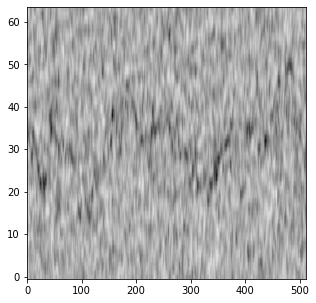

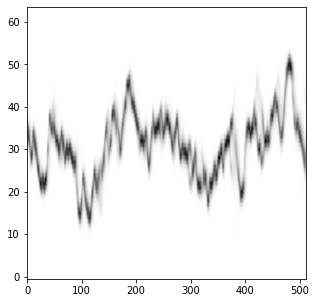

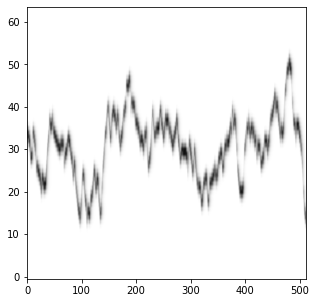

In [ ]:
#Net.load_P1_Model()
Net.test_P1(SNR=1.0,fs=(5,5))

In [ ]:
Net.save_Net()

# Train Second Pass Model

In [ ]:
Net.create_P2_Model(nN=32)

In [ ]:
Net.train_P2(DS, epochs=5,batch_size=16)

In [ ]:
Net.save_Net()

# Investigate Net

## Load/Refresh Net

In [ ]:
Net=GDFT_Net.load_GDFT_Net(root_Path+"/GDFT-Net/Saved_Models/Saved_Nets/(256x32)Test.pkl")
Net.load_models()

## Plot Net

In [ ]:
Net.plot_random_Example(SNR=0.8,fs=(15,10))

## Analyse net

In [4]:
from Core import GDFT_Tester 

Tester Version: 1.02


In [ ]:
from importlib import reload  
reload(GDFT_Tester)

In [5]:
Tester_Path= "Saved_Data/SET(64x64)Network.pkl"

tester=GDFT_Tester.GDFT_Net_Tester(Tester_Path,Net.path)

In [8]:
tester.load_Net()

ValueError: Unknown layer: Functional

In [ ]:
SNRs = np.linspace(0.5,1.5,10)
n = 10
tester.run_RMSE_Testing(n,SNRs)

In [ ]:
tester.get_RMSE_at_index(0)

In [1]:
import pandas as pd